       Month  milkproduction
0    1962-01             589
1    1962-02             561
2    1962-03             640
3    1962-04             656
4    1962-05             727
5    1962-06             697
6    1962-07             640
7    1962-08             599
8    1962-09             568
9    1962-10             577
10   1962-11             553
11   1962-12             582
12   1963-01             600
13   1963-02             566
14   1963-03             653
15   1963-04             673
16   1963-05             742
17   1963-06             716
18   1963-07             660
19   1963-08             617
20   1963-09             583
21   1963-10             587
22   1963-11             565
23   1963-12             598
24   1964-01             628
25   1964-02             618
26   1964-03             688
27   1964-04             705
28   1964-05             770
29   1964-06             736
..       ...             ...
138  1973-07             881
139  1973-08             837
140  1973-09  

C:\Users\Dell\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1976-01-01    865.174111
Freq: MS, dtype: float64


C:\Users\Dell\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1976-02-01    818.038343
Freq: MS, dtype: float64


C:\Users\Dell\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1976-03-01    925.006299
Freq: MS, dtype: float64


C:\Users\Dell\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1976-04-01    938.051543
Freq: MS, dtype: float64


C:\Users\Dell\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1976-05-01    1001.298679
Freq: MS, dtype: float64


C:\Users\Dell\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1976-06-01    974.037408
Freq: MS, dtype: float64


C:\Users\Dell\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1976-07-01    932.836047
Freq: MS, dtype: float64


C:\Users\Dell\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1976-08-01    893.09954
Freq: MS, dtype: float64


C:\Users\Dell\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1976-09-01    846.655243
Freq: MS, dtype: float64


C:\Users\Dell\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1976-10-01    851.408085
Freq: MS, dtype: float64


C:\Users\Dell\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1976-11-01    817.01306
Freq: MS, dtype: float64


C:\Users\Dell\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1976-12-01    859.137781
Freq: MS, dtype: float64


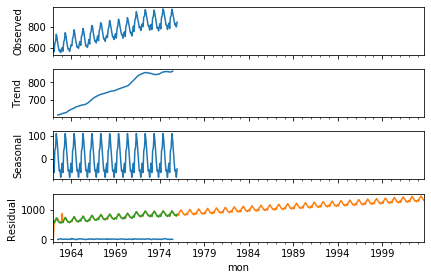

In [8]:
from statsmodels.tsa import seasonal,arima_model
import statsmodels.api as st
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('E:\Time_series\data\monthly-milk-production-pounds-p.csv')
#data cleaning 
data.dropna(axis=0,inplace = True)
print(data)
# column name change
data.columns = ['mon','mp']
#date time conversion
data['mon']=pd.to_datetime(data['mon'])
print(data)
#ste datatime as index
data.set_index('mon',inplace=True)
print(data)
tm = data['mp']
print(tm)
tm1 = tm.copy()
vd = seasonal.seasonal_decompose(tm1)
vd.plot()

num_sample_to_forcast = 12
for i in range(0,num_sample_to_forcast):
    #seasonal model creation for arima
    model1 = st.tsa.statespace.SARIMAX(tm,order=(1,1,1),seasonal_order=(1,1,1,12))
    res1=model1.fit()
    #forcasting only one value
    new_op=res1.forecast()
    print(new_op)
    tm = pd.concat([tm,new_op]) #train data retain
z=res1.predict(start=0,end=500)
z.plot();
tm1.plot();
plt.show()
